In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import datasist as ds
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# from autoviz.AutoViz_Class import AutoViz_Class
from sklearn.model_selection import cross_val_score

In [2]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from catboost import CatBoostClassifier, Pool
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifierCV, Lasso

import tensorflow as tf
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

In [3]:
# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [4]:
# loading our training and testing datasets
path = 'Untitled spreadsheet  Sheet6.csv'
#path2 = 'loss.csv'
train=pd.read_csv(path)
#test=pd.read_csv(path)

In [1]:
#train.head()

In [2]:
#train.head()

In [5]:
#train.info()

In [8]:
train.describe()

,EmployerCode,PrinceInstall,ExpectedAmount,DefaultedAmount,Days,Provision,PProvision,BranchCode
count,9995.000000,9993.000000,9.993000e+03,9995.000000,9995.000000,9995.000000,9995.000000,9995.0
mean,62.444122,6061.794478,7.399655e+04,1901.524985,7.283542,1009.634069,0.016323,3.0
std,277.796990,8197.477388,1.333495e+05,8794.426814,69.751543,4800.558592,0.068776,0.0
min,0.000000,50.000000,0.000000e+00,0.000000,0.000000,-1036.399600,0.010000,3.0
25%,1.000000,2416.666667,6.000000e+03,0.000000,0.000000,62.500000,0.010000,3.0
50%,1.000000,4444.444444,2.292585e+04,0.000000,0.000000,241.111000,0.010000,3.0
75%,4.000000,7333.333333,9.208300e+04,0.000000,0.000000,1066.666550,0.010000,3.0
max,11000.000000,220000.000000,3.750000e+06,164313.000000,3130.000000,320833.330000,1.000000,3.0


In [9]:
# Good No Null Values!
train.isnull().sum().max()

5

In [10]:
# getting the siszes of both our datasets
print("Train: ", train.shape)
#print("Test: ", test.shape)

Train:  (9995, 16)


In [11]:
train.columns

Index(['Repayment_Status', 'EmployerCode', 'PayrollNo', 'RepaymentDate',
       'TheLoanBal', 'InterestBal', 'PrinceInstall', 'ExpectedAmount',
       'DefaultedAmount', 'Days', 'Provision', 'PProvision', 'BranchCode',
       'Gender', 'Names_SerializedID', 'LoanTypeName'],
      dtype='object')

## EDA - Exploratory Data Analysis


In [12]:
# creating helper functions
class DataProcess:
    def __init__(self, df):
        self.df = df
        
    def Numerical(df):
        return df.select_dtypes(include=['int64', 'float64'])
        
    def Categorical(df):
        return df.select_dtypes(include=['object'])
        
    def Missing(df):
        return sns.heatmap(df.isnull(), cbar=False, cmap='viridis'); 
  
    
    def correlation_map(df):
        # Create figure and axes and set figure size
        f, ax = plt.subplots(figsize=(20,10))
        return sns.heatmap(data=df.corr(), annot=False);

In [13]:
# dropping inconsequent columns
cols = ['BranchCode']
train = train.drop(columns=cols, axis=1)
#test = test.drop(columns=cols, axis=1)

In [14]:
# getting numerical and categorical features
categorical_feat = DataProcess.Categorical(train)
numerical_feat = DataProcess.Numerical(train)

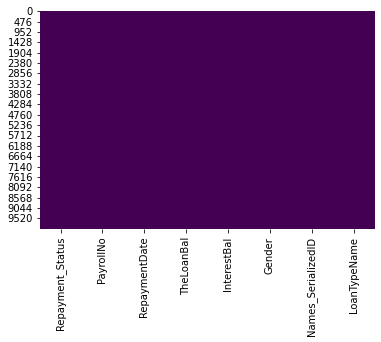

In [15]:
# plotting a heatmap for categorical features with missing values
DataProcess.Missing(categorical_feat);

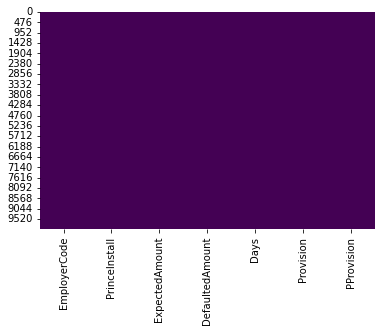

In [16]:
# plotting a heatmap for numerical features with missing values
DataProcess.Missing(numerical_feat);

In [17]:
# dropping null values
train = train.dropna()
print("Null values State: ", train.isna().sum().any())
train.head()

Null values State:  False


,Repayment_Status,EmployerCode,PayrollNo,RepaymentDate,TheLoanBal,InterestBal,PrinceInstall,ExpectedAmount,DefaultedAmount,Days,Provision,PProvision,Gender,Names_SerializedID,LoanTypeName
0,Performing,2,9308298,$:026240:02:2021,239019.78,0,6333.333333,278667.0,0.00,0,2390.1978,0.01,F,C0001,FIXED DEPOSIT ADVANCE
1,Performing,2,50422500000000,$:058991:05:2021,1195863.45,14228,25000.000000,1175000.0,0.00,0,11958.6345,0.01,F,C0002,FIXED DEPOSIT ADVANCE
2,Performing,4,50400123603,$:059373:05:2021,1999992.67,20338.4,166666.666700,1833333.0,0.00,0,19999.9267,0.01,F,C0003,FIXED DEPOSIT ADVANCE
3,Performing,51,pe/5363/2009,$:081944:07:2021,1082596,-13001,41666.666670,2041667.0,0.00,0,10825.9600,0.01,M,C0004,FIXED DEPOSIT ADVANCE
4,Performing,49,5042707503,$:088236:07:2021,547983.21,1.82E-12,11183.333330,547983.0,0.21,0,5479.8321,0.01,M,C0005,FIXED DEPOSIT ADVANCE


In [18]:
# class distribution of target
train['Repayment_Status'].value_counts()

Performing    9645
Loss           341
Name: Repayment_Status, dtype: int64

In [19]:
# The classes are heavily skewed we need to solve this issue later.
print('Non defaults', round(train['Repayment_Status'].value_counts()[0]/len(train) * 100,2), '% of the dataset')
print('Defaults', round(train['Repayment_Status'].value_counts()[1]/len(train) * 100,2), '% of the dataset')

Non defaults 96.59 % of the dataset
Defaults 3.41 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (Performing: Non- default || Loss: Default)')

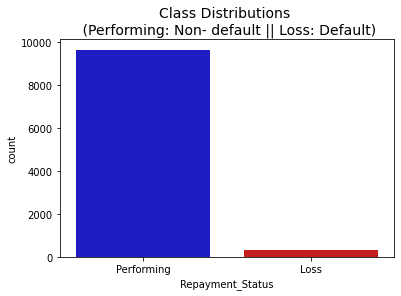

In [20]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Repayment_Status', data=train, palette=colors)
plt.title('Class Distributions \n (Performing: Non- default || Loss: Default)', fontsize=14)

<AxesSubplot:ylabel='Density'>

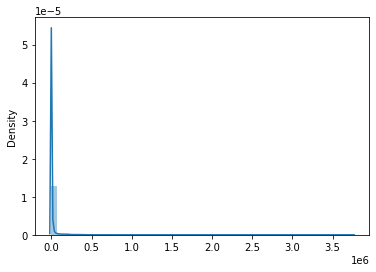

In [21]:
# plotting the distribution for our numerical features
sns.distplot(numerical_feat)

In [22]:
# checking the distribution of our numerical features
from scipy.stats import skew

def skewness_df(df):
  numeric_feats = df.dtypes[df.dtypes != "object"].index
  # Check the skew of all numerical features
  skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
  print("\nSkew in numerical features: \n")
  skewness = pd.DataFrame({'Skew' :skewed_feats})
  skewnessgreat = skewness[abs(skewness) > 0.75]
  print("There are {} skewed numerical features to Box Cox transform".format(skewnessgreat.shape[0]))
  return skewed_feats, skewness, skewnessgreat

skewed_feats, skewness, skewnessgreat = skewness_df(train)


Skew in numerical features: 

There are 7 skewed numerical features to Box Cox transform


In [23]:
# checking features with skewness
skewed_feats

Provision          42.602811
Days               23.944686
EmployerCode       19.974076
PProvision         14.055319
PrinceInstall      11.199106
DefaultedAmount     9.031740
ExpectedAmount      7.909051
dtype: float64

In [24]:
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormapscorr.style.background_gradient(cmap='coolwarm').set_precision(2)

,EmployerCode,PrinceInstall,ExpectedAmount,DefaultedAmount,Days,Provision,PProvision
EmployerCode,1.000000,-0.049002,-0.043049,-0.015960,-0.014454,-0.020535,-0.016177
PrinceInstall,-0.049002,1.000000,0.448894,0.261975,-0.005823,0.153896,-0.006633
ExpectedAmount,-0.043049,0.448894,1.000000,0.144376,-0.023596,0.342897,-0.029588
DefaultedAmount,-0.015960,0.261975,0.144376,1.000000,0.144171,0.515649,0.218435
Days,-0.014454,-0.005823,-0.023596,0.144171,1.000000,0.226269,0.820951
Provision,-0.020535,0.153896,0.342897,0.515649,0.226269,1.000000,0.383481
PProvision,-0.016177,-0.006633,-0.029588,0.218435,0.820951,0.383481,1.000000


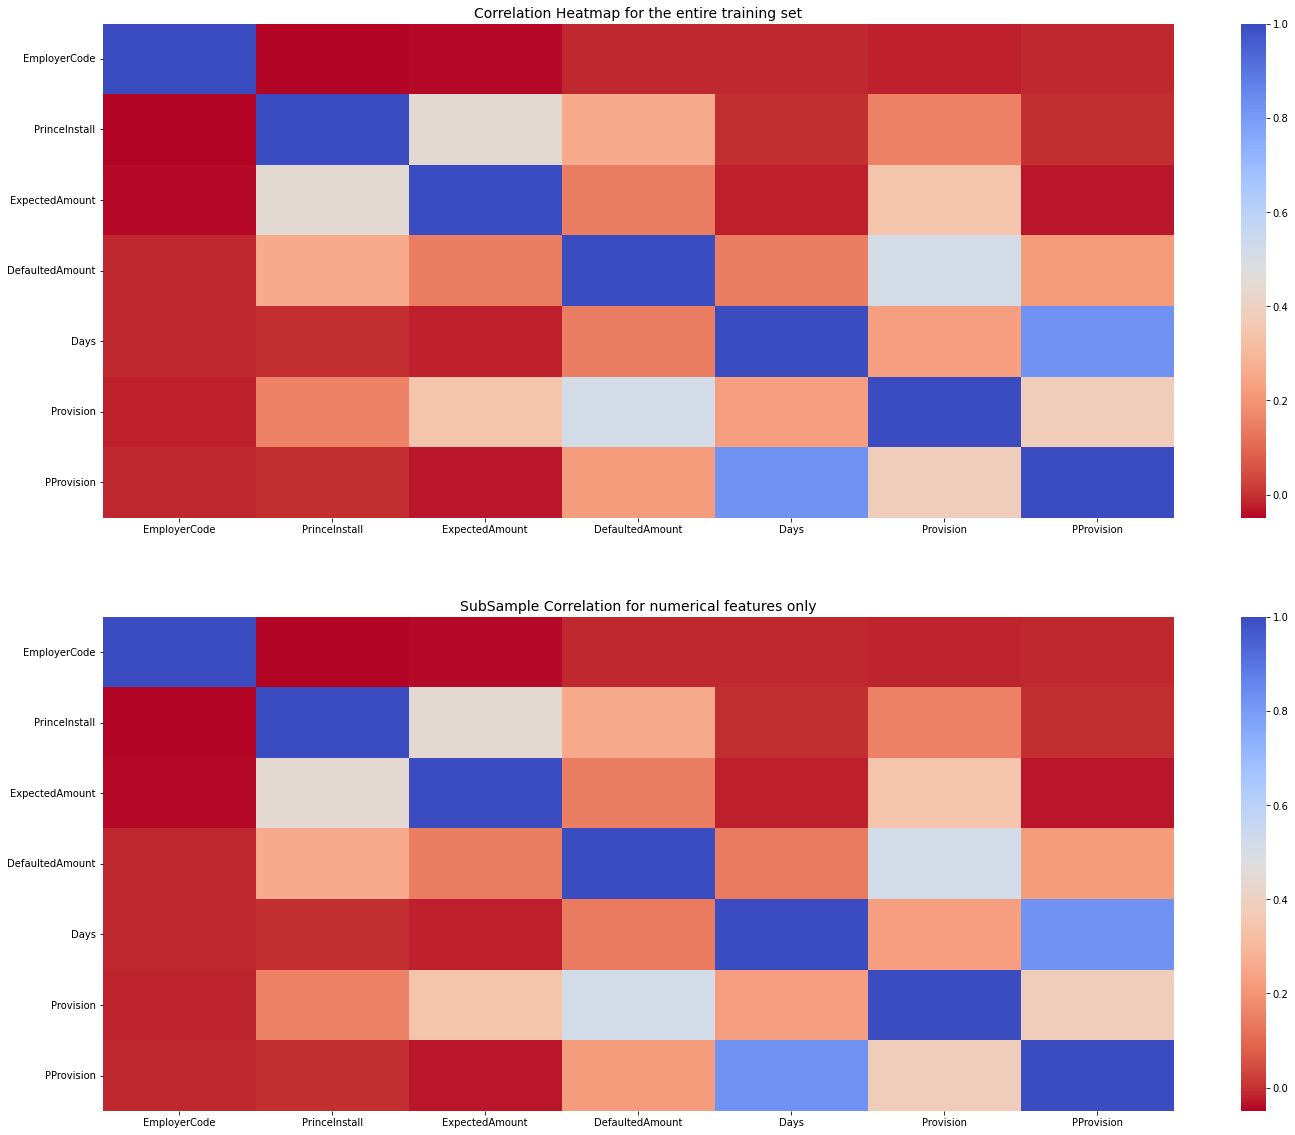

In [25]:
# doing a correlation plot
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

corr = train.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Correlation Heatmap for the entire training set", fontsize=14)


sub_sample_corr = numerical_feat.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation for numerical features only', fontsize=14)
plt.show()

## FEATURE ENGINEERING


feature engineering is the process if using existing features in our training dataset to come up with new features that may increase the scope of our dataset to improve on the training features for our algorithm later on

In [ ]:
# dropping cols in train but not in test
empty = []
for col in train.columns:
  if col not in test.columns:
    empty.append(col)

empty

In [ ]:
# converting time features to datetime
time_feats_train = ['TransactionStartTime', 'IssuedDateLoan']
time_feats_test = ['TransactionStartTime', 'IssuedDateLoan']

for col in time_feats_train:
  train[col] = pd.to_datetime(train[col])

  train[col+"_Day"] = train[col].dt.day
  train[col+"_Month"] = train[col].dt.month
  train[col+"_Year"] = train[col].dt.year
  train[col+"_hour"] = train[col].dt.hour
  train[col+"_minute"] = train[col].dt.minute

for col in time_feats_test:
  test[col] = pd.to_datetime(test[col])

  test[col+"_Day"] = test[col].dt.day
  test[col+"_Month"] = test[col].dt.month
  test[col+"_Year"] = test[col].dt.year
  test[col+"_hour"] = test[col].dt.hour
  test[col+"_minute"] = test[col].dt.minute

# notice the new time features generated
print("Train: ", train.shape)
print("Test: ", test.shape)

## Feature preprocessing

Here we are going to preprocess our features by encoding our categorical features as well as scalling our numerical features before applying modelling techniques

we are also going to look into the balancing our target variable one is by doing it manually then later on try out hybrid mechanissm like using SMOTE oversamppling techniques

In [6]:
#categorical_feat


In [28]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# list of categorical features
cols_to_encode = categorical_feat.columns

# encoding function
def label_enc(df, col_list):
  encoder = LabelEncoder()
  for col in col_list:
    df[col] = encoder.fit_transform(df[col])
  return df

train = label_enc(train, cols_to_encode)
test = label_enc(train, cols_to_encode)
# cheking first few cols of train set
train.head(2)

,Repayment_Status,EmployerCode,PayrollNo,RepaymentDate,TheLoanBal,InterestBal,PrinceInstall,ExpectedAmount,DefaultedAmount,Days,Provision,PProvision,Gender,Names_SerializedID,LoanTypeName
0,1,2,6860,0,1980,1463,6333.333333,278667.0,0.0,0,2390.1978,0.01,0,0,6
1,1,2,3679,1,657,1718,25000.000000,1175000.0,0.0,0,11958.6345,0.01,0,1,6


undersampling involves taking the over represented class and down sampling it to be equal with the under represented class the vice versa applies for oversampling

In [29]:
# doing a correlation plot
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormapscorr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Repayment_Status,EmployerCode,PayrollNo,RepaymentDate,TheLoanBal,InterestBal,PrinceInstall,ExpectedAmount,DefaultedAmount,Days,Provision,PProvision,Gender,Names_SerializedID,LoanTypeName
Repayment_Status,1.000000,0.011495,-0.014202,0.077325,-0.072845,-0.093504,-0.010817,0.004232,-0.273022,-0.446839,-0.137131,-0.363649,-0.006023,-0.239936,-0.005784
EmployerCode,0.011495,1.000000,0.077475,0.027644,0.050276,0.074224,-0.049002,-0.043049,-0.015960,-0.014454,-0.020535,-0.016177,-0.121116,-0.001779,0.009468
PayrollNo,-0.014202,0.077475,1.000000,-0.007349,0.003971,0.045683,-0.090935,-0.095872,-0.031001,0.022578,-0.049608,-0.000312,-0.093376,0.006725,0.046571
RepaymentDate,0.077325,0.027644,-0.007349,1.000000,-0.053779,-0.041718,-0.065360,-0.079656,-0.062999,0.019967,-0.025209,0.036295,0.048993,0.575800,0.309403
TheLoanBal,-0.072845,0.050276,0.003971,-0.053779,1.000000,0.121306,0.002093,0.138043,0.063392,0.037311,0.049668,0.032849,-0.016378,0.065469,-0.045736
InterestBal,-0.093504,0.074224,0.045683,-0.041718,0.121306,1.000000,-0.009703,-0.076056,0.154078,0.077420,0.033185,0.082059,-0.018278,0.136431,0.137248
PrinceInstall,-0.010817,-0.049002,-0.090935,-0.065360,0.002093,-0.009703,1.000000,0.448894,0.261975,-0.005823,0.153896,-0.006633,0.045145,-0.027364,-0.124223
ExpectedAmount,0.004232,-0.043049,-0.095872,-0.079656,0.138043,-0.076056,0.448894,1.000000,0.144376,-0.023596,0.342897,-0.029588,0.022953,-0.056517,-0.501501
DefaultedAmount,-0.273022,-0.015960,-0.031001,-0.062999,0.063392,0.154078,0.261975,0.144376,1.000000,0.144171,0.515649,0.218435,-0.014305,0.303148,-0.073274
Days,-0.446839,-0.014454,0.022578,0.019967,0.037311,0.077420,-0.005823,-0.023596,0.144171,1.000000,0.226269,0.820951,0.022684,0.143536,0.045728


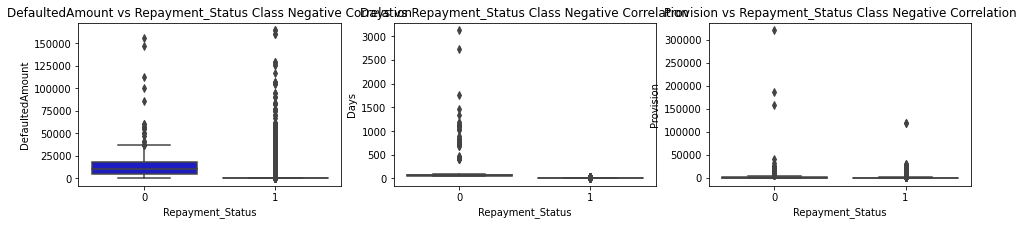

In [30]:
f, axes = plt.subplots(ncols=3, figsize=(16,3))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a defaulted transaction)
sns.boxplot(x="Repayment_Status", y="DefaultedAmount", data=train, palette=colors, ax=axes[0])
axes[0].set_title('DefaultedAmount vs Repayment_Status Class Negative Correlation')

sns.boxplot(x="Repayment_Status", y="Days", data=train, palette=colors, ax=axes[1])
axes[1].set_title('Days vs Repayment_Status Class Negative Correlation')


sns.boxplot(x="Repayment_Status", y="Provision", data=train, palette=colors, ax=axes[2])
axes[2].set_title('Provision vs Repayment_Status Class Negative Correlation')


plt.show()

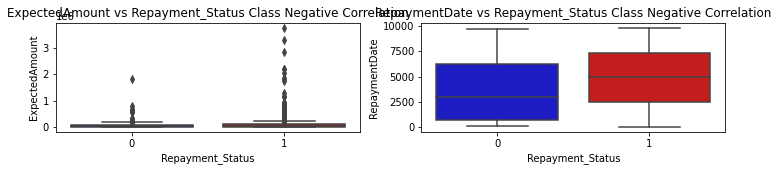

In [31]:
f, axes = plt.subplots(ncols=2, figsize=(12,2))

# Positive correlations (The higher the feature the probability increases that it will be a default transaction)
sns.boxplot(x="Repayment_Status", y="ExpectedAmount", data=train, palette=colors, ax=axes[0])
axes[0].set_title('ExpectedAmount vs Repayment_Status Class Negative Correlation')

sns.boxplot(x="Repayment_Status", y="RepaymentDate", data=train, palette=colors, ax=axes[1])
axes[1].set_title('RepaymentDate vs Repayment_Status Class Negative Correlation')

plt.show()

Text(0.5, 1.0, 'Class Distributions \n (0: Defaults || 1: Non Defaults)')

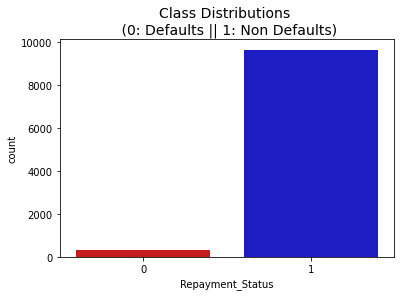

In [32]:
colors = ["#DF0101","#0101DF"]

sns.countplot('Repayment_Status', data=train, palette=colors)
plt.title('Class Distributions \n (0: Defaults || 1: Non Defaults)', fontsize=14)

<AxesSubplot:title={'center':'Manual Undersampling (target column)'}>

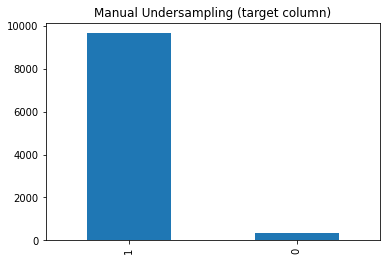

In [33]:
# manual undersampling
def undersample_manual(train_df, index):
  train_df = train_df.sample(frac=1)
  # amount of unsafe classes 176 rows.
  unsafe_train_df = train_df.loc[train_df['Repayment_Status'] == 1]
  non_unsafe_train_df = train_df.loc[train_df['Repayment_Status'] == 0][:index]
  normal_distributed_train_df = pd.concat([unsafe_train_df, non_unsafe_train_df])
  new_train_df = normal_distributed_train_df.sample(frac=1, random_state=42)
  return new_train_df

train_Usampling = undersample_manual(train, 341)

# checking the distribution of our target variable
train_Usampling['Repayment_Status'].value_counts().plot(kind='bar', title='Manual Undersampling (target column)')

Random over-sampling:
1    9645
0     341
Name: Repayment_Status, dtype: int64


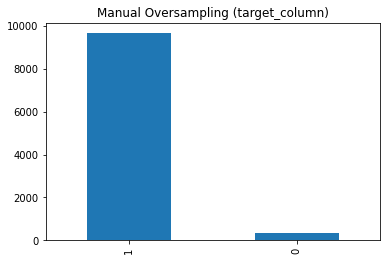

In [34]:
def oversample_manually(train_df):
  # Class count
  count_class_0, count_class_1 = train_df.Repayment_Status.value_counts()
  # Divide by class
  df_class_0 = train_df[train_df['Repayment_Status'] == 0]
  df_class_1 = train_df[train_df['Repayment_Status'] == 1]
  df_class_1_over = df_class_1.sample(count_class_0, replace=True)
  df_train_over = pd.concat([df_class_0, df_class_1_over], axis=0)
  print('Random over-sampling:')
  print(df_train_over.Repayment_Status.value_counts())

  df_train_over.Repayment_Status.value_counts().plot(kind='bar', title='Manual Oversampling (target_column)')

  return df_train_over

train_Osampling = oversample_manually(train)

**Imblearn**

here we are going to use various imblearn sampling techniques where we weill majorly focus on SMOTE

In [35]:
# importing various libraries inside imblearn
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.over_sampling import RandomOverSampler, SMOTE

def sample_imblearn(X, y, sampling):
  if sampling == 'under':
    rus = RandomUnderSampler()
    X_rus, y_rus = rus.fit_resample(X, y)

  if sampling == 'over':
    rus = RandomOverSampler()
    X_rus, y_rus = rus.fit_resample(X, y)

  if sampling =='tomek':
      rus = TomekLinks()
      X_rus, y_rus = rus.fit_resample(X, y)

  if sampling == 'smote_under':
      rus = SMOTE(ratio='minority')
      X_rus, y_rus = rus.fit_resample(X, y)

  if sampling == 'smote_over':
      rus = SMOTE(ratio='majority')
      X_rus, y_rus = rus.fit_resample(X, y)
  return X_rus, y_rus
# X, y = sample_imblearn(X, y, sampling):

# feature selection
X = train.drop('Repayment_Status', axis=1)
y = train['Repayment_Status']

X_smote_over, y_smote_over = sample_imblearn(X, y, 'over')
X_smote_under, y_smote_under = sample_imblearn(X, y, 'under')


<AxesSubplot:title={'center':'Smote Undersampling(Target column))'}>

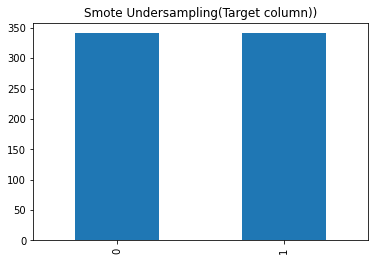

In [36]:
# visualizing the SMOTE undersamplingsampling techniques
y_smote_under.value_counts().plot(kind='bar', title='Smote Undersampling(Target column))')

<AxesSubplot:title={'center':'Smote Oversampling (target column))'}>

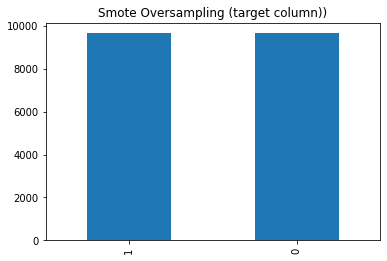

In [37]:
# visualizing the SMOTE oversamplingsampling techniques
y_smote_over.value_counts().plot(kind='bar', title='Smote Oversampling (target column))')

### Dimensionality Reduction
1. Undersampled Dataset
Understanding t-SNE:
    
    
In order to understand this algorithm you have to understand the following terms:
- Euclidean Distance
- Conditional Probability
- Normal and T-Distribution Plots

Summary:
    
    
- t-SNE algorithm can pretty accurately cluster the cases that were fraud and non-fraud in our dataset.
- Although the subsample is pretty small, the t-SNE algorithm is able to detect clusters pretty accurately in every scenario (I shuffle the dataset before running t-SNE)
- This gives us an indication that further predictive models will perform pretty well in separating fraud cases from non-fraud cases.

In [38]:
# Dimensionality Reduction
# train_Usampling is from the manual random undersample data (fewer instances)
X_us = train_Usampling.drop('Repayment_Status', axis=1)
y_us = train_Usampling['Repayment_Status']


# T-SNE Implementation
t0 = time.time()
Xus_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_us.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
Xus_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X_us.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
Xus_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X_us.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 3.8e+01 s
PCA took 0.34 s
Truncated SVD took 0.012 s


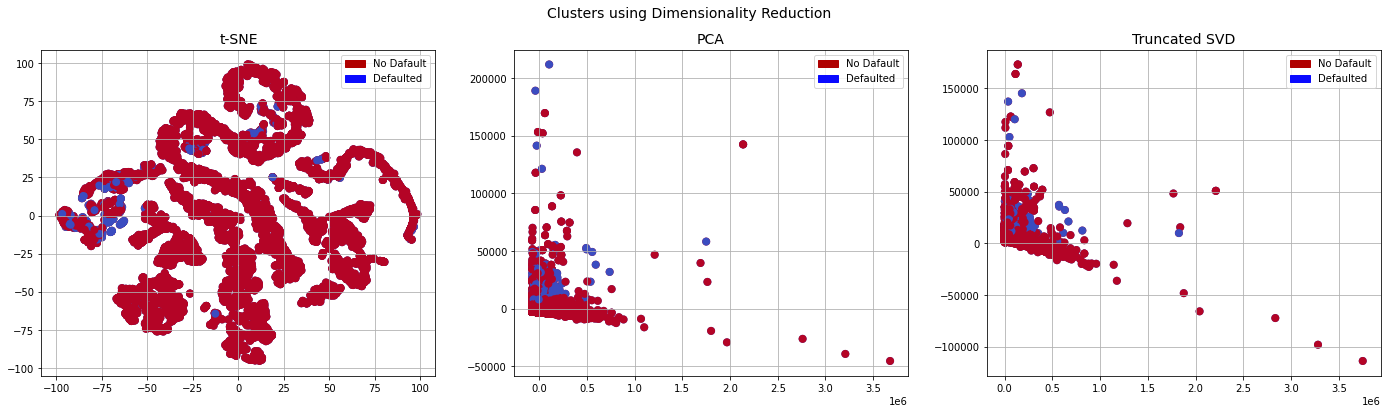

In [39]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#AF0000', label='No Dafault')
red_patch = mpatches.Patch(color='#0A0AFF', label='Defaulted')


# t-SNE scatter plot
ax1.scatter(Xus_reduced_tsne[:,0], Xus_reduced_tsne[:,1], c=(y_us == 0), cmap='coolwarm', label='No Default', linewidths=2)
ax1.scatter(Xus_reduced_tsne[:,0], Xus_reduced_tsne[:,1], c=(y_us == 1), cmap='coolwarm', label='Defaulted', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(Xus_reduced_pca[:,0], Xus_reduced_pca[:,1], c=(y_us == 0), cmap='coolwarm', label='No Default', linewidths=2)
ax2.scatter(Xus_reduced_pca[:,0], Xus_reduced_pca[:,1], c=(y_us == 1), cmap='coolwarm', label='Defaulted', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(Xus_reduced_svd[:,0], Xus_reduced_svd[:,1], c=(y_us == 0), cmap='coolwarm', label='No Default', linewidths=2)
ax3.scatter(Xus_reduced_svd[:,0], Xus_reduced_svd[:,1], c=(y_us == 1), cmap='coolwarm', label='Defaulted', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

2. Oversampled Dataset

In [40]:
# Dimensionality Reduction
# train_Osampling is from the manual random Oversampled data (More instances)
X_os = train_Osampling.drop('Repayment_Status', axis=1)
y_os = train_Osampling['Repayment_Status']


# T-SNE Implementation
t0 = time.time()
Xos_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_os.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
Xos_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X_os.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
Xos_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X_os.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 4.4e+01 s
PCA took 0.014 s
Truncated SVD took 0.011 s


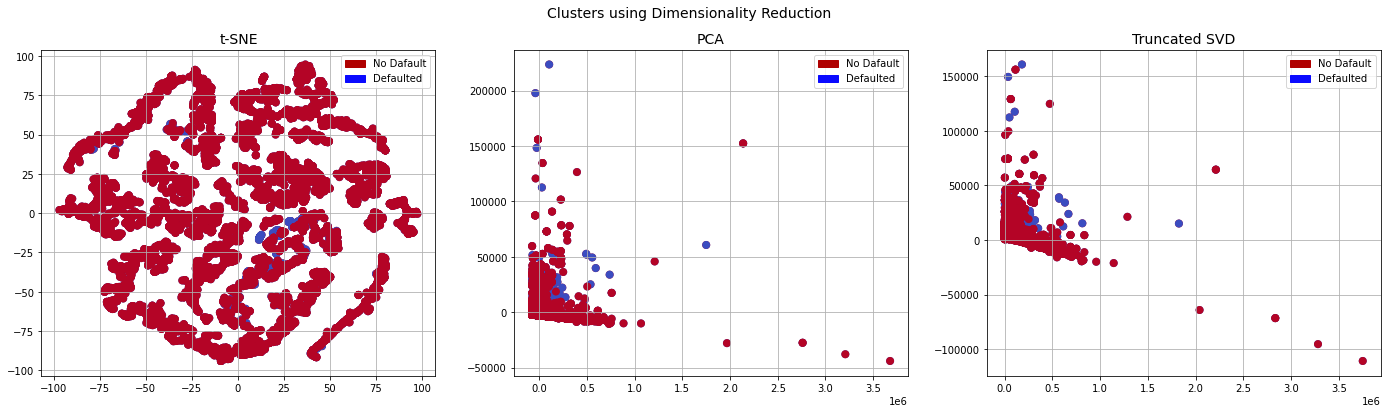

In [41]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#AF0000', label='No Dafault')
red_patch = mpatches.Patch(color='#0A0AFF', label='Defaulted')


# t-SNE scatter plot
ax1.scatter(Xos_reduced_tsne[:,0], Xos_reduced_tsne[:,1], c=(y_os == 0), cmap='coolwarm', label='No Default', linewidths=2)
ax1.scatter(Xos_reduced_tsne[:,0], Xos_reduced_tsne[:,1], c=(y_os == 1), cmap='coolwarm', label='Defaulted', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(Xos_reduced_pca[:,0], Xos_reduced_pca[:,1], c=(y_os == 0), cmap='coolwarm', label='No Default', linewidths=2)
ax2.scatter(Xos_reduced_pca[:,0], Xos_reduced_pca[:,1], c=(y_os == 1), cmap='coolwarm', label='Defaulted', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(Xos_reduced_svd[:,0], Xos_reduced_svd[:,1], c=(y_os == 0), cmap='coolwarm', label='No Default', linewidths=2)
ax3.scatter(Xos_reduced_svd[:,0], Xos_reduced_svd[:,1], c=(y_os == 1), cmap='coolwarm', label='Defaulted', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

## Modelling


here we are going to try out various classical machine learning algorithms and see how they perform with both the oversampled and undersampled datasets and see on which cases overfitting is likely to occur or underfitting.

this can be judged by how well the trained models will be able to genaralise to the test data which it has never seen before 

In [42]:
# splitting our datasets
from sklearn.model_selection import train_test_split

# manual undersampling  --test_size = 0.15
X_train_mus, X_test_mus, y_train_mus, y_test_mus = train_test_split(X_us, y_us, test_size=0.15, random_state=42)

# manual oversampling  --test_size = 0.2
X_train_mos, X_test_mos, y_train_mos, y_test_mos = train_test_split(X_os, y_os, test_size=0.2, random_state=42)

# smote undersampling  --test_size = 0.15
X_train_sus, X_test_sus, y_train_sus, y_test_sus = train_test_split(X_smote_under, y_smote_under, test_size=0.15, random_state=42)


# smote Oversampling  --test_size = 0.15
X_train_sos, X_test_sos, y_train_sos, y_test_sos = train_test_split(X_smote_over, y_smote_over, test_size=0.2, random_state=42)



Here we'll first start off by assessing the performance of a few baseline algorithms, This is to assess which algorithm performns well and at what scenario of sampled data. below is a dictionary of this classifiers, i.e from a basic logistic regressor to advanced gradient boosted algorithms such as XGBClassifier().

In [43]:
# baseline models
# Let's implement simple classifiers
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Extreem Gradient Boosting": XGBClassifier(),
    "Light Gradient Boosting": LGBMClassifier(),
    "Categorical Gradient Boosting": CatBoostClassifier(verbose=False)
}

In [44]:

# manual undersampling
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Manual Undersampling~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
for key, classifier in classifiers.items():
    classifier.fit(X_train_mus, y_train_mus)
    training_score = cross_val_score(classifier, X_train_mus, y_train_mus, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Manual Oversampling~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
for key, classifier in classifiers.items():
    classifier.fit(X_train_mos, y_train_mos)
    training_score = cross_val_score(classifier, X_train_mos, y_train_mos, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~SMOTE Undersampling~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
for key, classifier in classifiers.items():
    classifier.fit(X_train_sus, y_train_sus)
    training_score = cross_val_score(classifier, X_train_sus, y_train_sus, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~SMOTE Oversampling~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
for key, classifier in classifiers.items():
    classifier.fit(X_train_sos, y_train_sos)
    training_score = cross_val_score(classifier, X_train_sos, y_train_sos, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Manual Undersampling~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Classifiers:  LogisticRegression training score of 97.0 % accuracy score
Classifiers:  KNeighborsClassifier training score of 98.0 % accuracy score
Classifiers:  SVC training score of 97.0 % accuracy score
Classifiers:  DecisionTreeClassifier training score of 100.0 % accuracy score
Classifiers:  RandomForestClassifier training score of 100.0 % accuracy score
Classifiers:  XGBClassifier training score of 100.0 % accuracy score
Classifiers:  LGBMClassifier training score of 100.0 % accuracy score
Classifiers:  CatBoostClassifier training score of 100.0 % accuracy score
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Manual Oversampling~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Classifiers:  LogisticRegression training score of 97.0 % accuracy score
Classifiers:  KNeighborsClassifier training score of 98.0 % accuracy score
Classifiers:  SVC training score of 97.0 % accuracy score
Classifiers:  DecisionTreeClassifier

From the above cross validated scores we can see that oversampled datasets give better score this is because undersampled datasets have fewer data points and this leads to **underfitting**. This is associated with the model not generalising well to the data which leads to poor performance in both the training and validation sets.

This is not to say that oversampled data doesnt have it's cons, it might give good results in the training phase but give poor results with new data. this phenomena is called overfitting. 

We are going to select three best performing algorithms and tune them as well as plot their learning curves to see wether they are overfitting and later on compare the best with a neural network algorithm. This models are:

1. Logisic Regressor
2. K-nearest Neighbors Classifier
3. Random Forest classifier
4. Light Gradient Boosted Classifier

Here henceforth we are going to proceed with SMOTE oversampled training and validation sets


In [45]:
# renaming our data in form of arrays
X_train, X_test, y_train, y_test = X_train_sos.values, X_test_sos.values, y_train_sos.values, y_test_sos.values

In [46]:
# Hyper-parameter Tuning
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Random Forest Classifier
rf_params = {"max_features":['auto', 'sqrt'], "min_samples_split":[2, 5, 10],
             "min_samples_leaf":[1, 2, 4],  "bootstrap":[True, False]}
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params)
grid_rf.fit(X_train, y_train)

# RF best estimator
grid_rf = grid_rf.best_estimator_

# LGBMClassifier Classifier
lgbm_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_lgbm = GridSearchCV(LGBMClassifier(), lgbm_params)
grid_lgbm.fit(X_train, y_train)

# tree best estimator
lgbm_clf = grid_lgbm.best_estimator_

[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: 

In [47]:
# plotting learning curves
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Random Forest classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("LGBM Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    
    return plt

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: 

[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: 

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] min_data_in_leaf is

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] min_data_in_leaf is

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] min_data_in_leaf is

<module 'matplotlib.pyplot' from '/home/datax/anaconda3/envs/tensorflow2/lib/python3.9/site-packages/matplotlib/pyplot.py'>

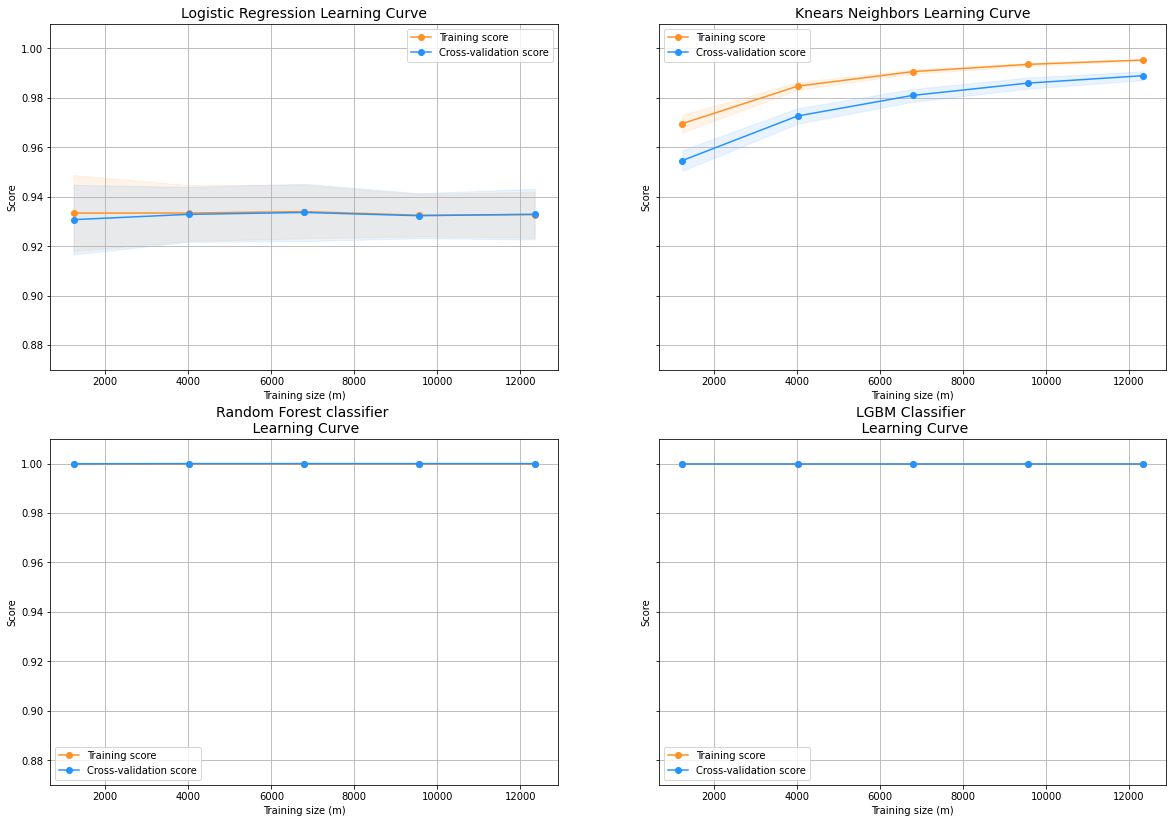

In [48]:
# calling the learning curve function
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, grid_rf, lgbm_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

plotting an ROC Curve for the 4 best classifiers

In [49]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_test, y_test, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_test, y_test, cv=5)

rf_pred = cross_val_predict(grid_rf, X_test, y_test, cv=5,
                             )

lgbm_pred = cross_val_predict(lgbm_clf, X_test, y_test, cv=5)

[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5


In [50]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_test, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_test, knears_pred))
print('Random Forest Classifier: ', roc_auc_score(y_test, rf_pred))
print('LGBM Classifier: ', roc_auc_score(y_test, lgbm_pred))

Logistic Regression:  0.9562362832679051
KNears Neighbors:  0.9685282223652787
Random Forest Classifier:  1.0
LGBM Classifier:  1.0


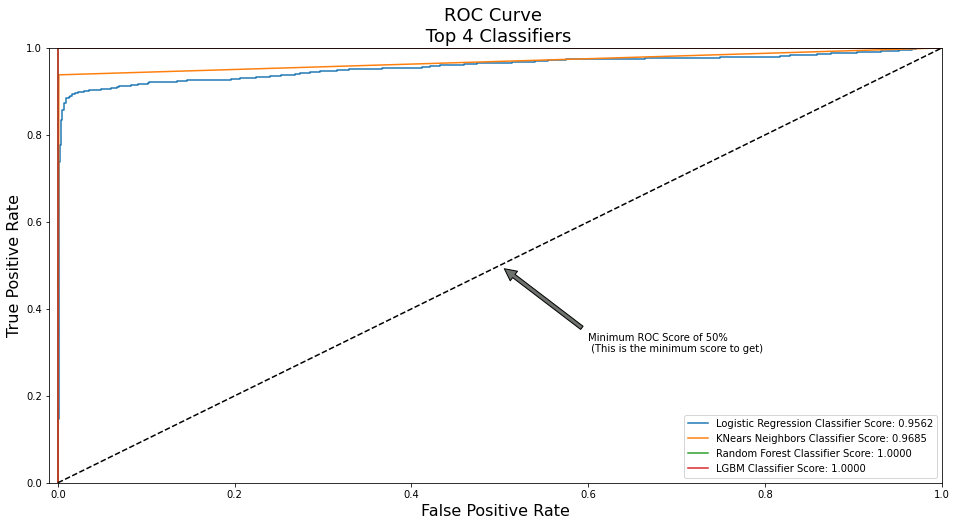

In [51]:
# ROC Curve
log_fpr, log_tpr, log_thresold = roc_curve(y_test, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_test, knears_pred)
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, rf_pred)
lgbm_fpr, lgbm_tpr, lgbm_threshold = roc_curve(y_test, lgbm_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, rf_fpr, rf_tpr, lgbm_fpr, lgbm_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, knears_pred)))
    plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_test, rf_pred)))
    plt.plot(lgbm_fpr, lgbm_tpr, label='LGBM Classifier Score: {:.4f}'.format(roc_auc_score(y_test, lgbm_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, rf_fpr, rf_tpr, lgbm_fpr, lgbm_tpr)
plt.show()

### Classification reports and final comparisons with neural nets

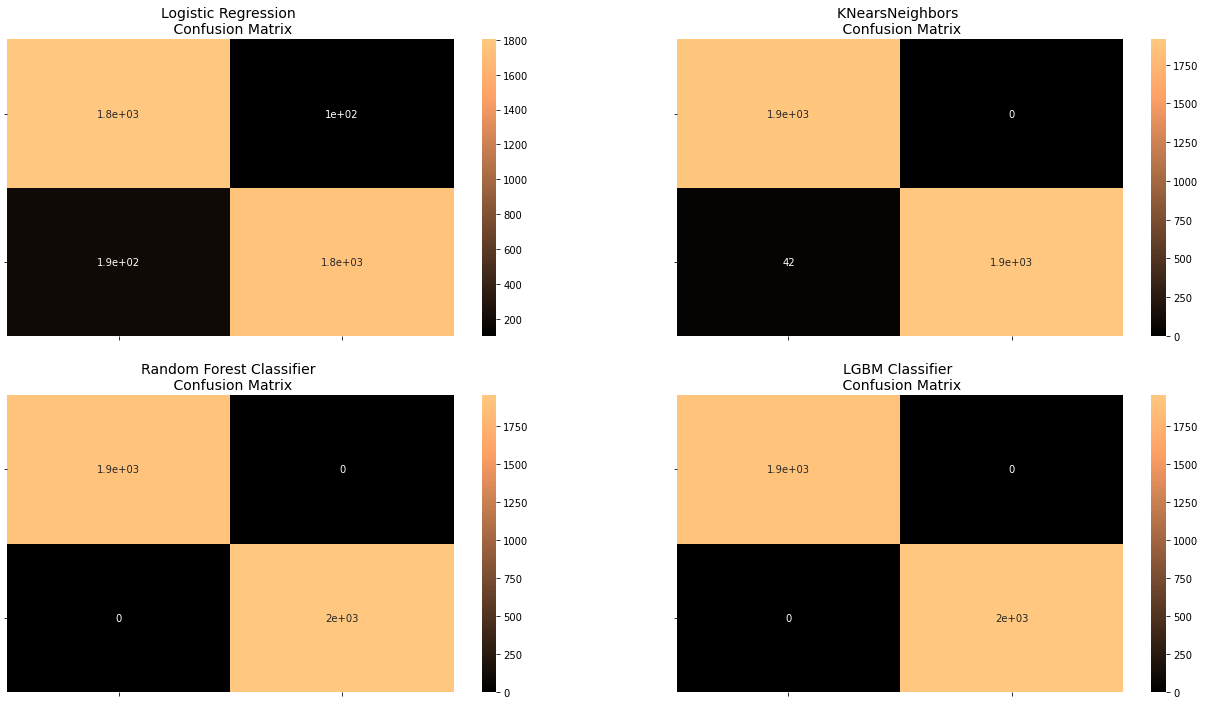

In [52]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_rf = grid_rf.predict(X_test)
y_pred_lgbm = lgbm_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
rf_cf = confusion_matrix(y_test, y_pred_rf)
lgbm_cf = confusion_matrix(y_test, y_pred_lgbm)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(rf_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Random Forest Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(lgbm_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("LGBM Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [53]:
from sklearn.metrics import classification_report

print('Logistic regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Random Forest Classifier:')
print(classification_report(y_test, y_pred_rf))

print('LGBM Classifier:')
print(classification_report(y_test, y_pred_lgbm))

Logistic regression:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1903
           1       0.95      0.90      0.92      1955

    accuracy                           0.92      3858
   macro avg       0.92      0.92      0.92      3858
weighted avg       0.92      0.92      0.92      3858

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1903
           1       1.00      0.98      0.99      1955

    accuracy                           0.99      3858
   macro avg       0.99      0.99      0.99      3858
weighted avg       0.99      0.99      0.99      3858

Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1903
           1       1.00      1.00      1.00      1955

    accuracy                           1.00      3858
   macro avg       1.00      1.00      1.00      3858
weighted 

In [54]:
from sklearn.metrics import classification_report

print('logistic reg:')
print(classification_report(y_test, y_pred_log_reg))

logistic reg:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1903
           1       0.95      0.90      0.92      1955

    accuracy                           0.92      3858
   macro avg       0.92      0.92      0.92      3858
weighted avg       0.92      0.92      0.92      3858



### Tensorflow's Keras

usaing the keras library to biuld a neural network from scratch

1. using Manual Oversampled Data

In [55]:
#pip show tensorflow

In [56]:
import keras
from keras import backend as K
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
#from keras.models import Sequential
from tensorflow.keras import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [57]:
# redefining our manually oversampled dataset
X_train_mos, X_test_mos, y_train_mos, y_test_mos = X_train_mos.values, X_test_mos.values, y_train_mos.values, y_test_mos.values

In [58]:
# defining the number of inputs
n_inputs = X_train_mos.shape[1]

# biulding our layers
oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(8, activation='relu'),
    Dense(2, activation='sigmoid')
])

# compiling our model
oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# vewing the models summary
oversample_model.summary()

2022-08-06 16:07:57.478137: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-06 16:07:57.512770: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                210       
                                                                 
 dense_1 (Dense)             (None, 8)                 120       
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 348
Trainable params: 348
Non-trainable params: 0
_________________________________________________________________


In [59]:
# training our model
oversample_model.fit(X_train_mos, y_train_mos, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
22/22 - 3s - loss: 406.5977 - accuracy: 0.9490 - val_loss: 230.1790 - val_accuracy: 0.9499 - 3s/epoch - 148ms/step
Epoch 2/20
22/22 - 0s - loss: 194.6098 - accuracy: 0.9438 - val_loss: 101.9252 - val_accuracy: 0.9287 - 120ms/epoch - 5ms/step
Epoch 3/20
22/22 - 0s - loss: 74.8201 - accuracy: 0.9085 - val_loss: 58.7164 - val_accuracy: 0.9368 - 138ms/epoch - 6ms/step
Epoch 4/20
22/22 - 0s - loss: 50.0725 - accuracy: 0.9218 - val_loss: 38.0198 - val_accuracy: 0.9274 - 190ms/epoch - 9ms/step
Epoch 5/20
22/22 - 0s - loss: 34.3877 - accuracy: 0.9232 - val_loss: 27.7437 - val_accuracy: 0.9312 - 151ms/epoch - 7ms/step
Epoch 6/20
22/22 - 0s - loss: 26.0917 - accuracy: 0.9299 - val_loss: 21.0017 - val_accuracy: 0.9280 - 186ms/epoch - 8ms/step
Epoch 7/20
22/22 - 0s - loss: 19.5518 - accuracy: 0.9357 - val_loss: 14.8902 - val_accuracy: 0.9474 - 202ms/epoch - 9ms/step
Epoch 8/20
22/22 - 0s - loss: 14.7562 - accuracy: 0.9471 - val_loss: 12.0599 - val_accuracy: 0.9324 - 235ms/epoch - 11ms/s

In [60]:
# making predictions
oversample_predictions = oversample_model.predict(X_test_mos, batch_size=200, verbose=0)

# getting the defaulted predictions
oversample_default_predictions = np.argmax(oversample_predictions, axis=1)

In [61]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[  73    2]
 [1702  221]]
Confusion matrix, without normalization
[[  75    0]
 [   0 1923]]


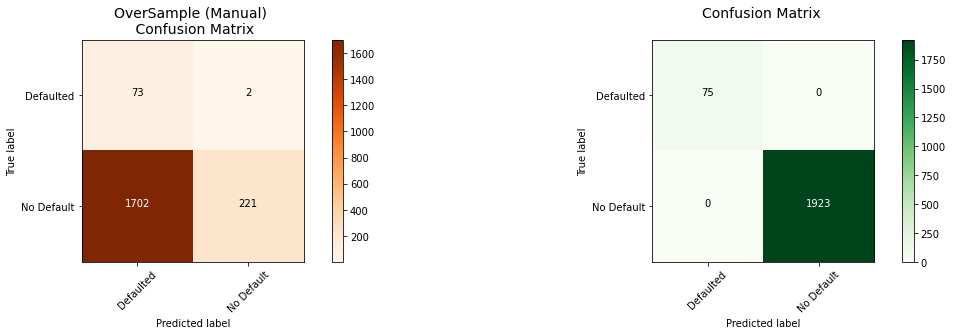

In [63]:
oversample_manual = confusion_matrix(y_test_mos, oversample_default_predictions)
actual_cm = confusion_matrix(y_test_mos, y_test_mos)
labels = ['Defaulted', 'No Default']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_manual, labels, title="OverSample (Manual) \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n ", cmap=plt.cm.Greens)

In [64]:
from sklearn.metrics import classification_report

print('Neural net:')
print(classification_report(y_test_mos, oversample_default_predictions))

Neural net:
              precision    recall  f1-score   support

           0       0.04      0.97      0.08        75
           1       0.99      0.11      0.21      1923

    accuracy                           0.15      1998
   macro avg       0.52      0.54      0.14      1998
weighted avg       0.96      0.15      0.20      1998



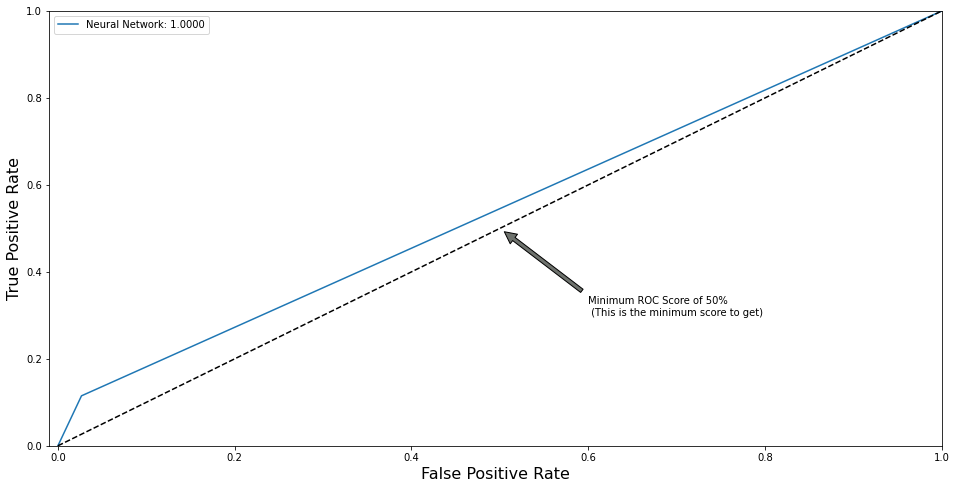

In [65]:
# ROC Curve
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test_mos, oversample_default_predictions)

def graph_roc_curve_multiple(rf_fpr, rf_tpr):
    plt.figure(figsize=(16,8))
    plt.plot(rf_fpr, rf_tpr, label='Neural Network: {:.4f}'.format(roc_auc_score(y_test, rf_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(rf_fpr, rf_tpr)
plt.show()

2. Using SMOTE Oversampled Dataset

In [66]:
# redefining our smote oversampled data
X_train_sos, X_test_sos, y_train_sos, y_test_sos = X_train_sos.values, X_test_sos.values, y_train_sos.values, y_test_sos.values

In [67]:
# defining the number of inputs
n_inputs = X_train_sos.shape[1]

# biulding our layers
smote_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(25, input_dim=25, activation='relu'),
    Dense(2, activation='softmax')
])

# compiling our model
smote_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# vewing the models summary
smote_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 14)                210       
                                                                 
 dense_4 (Dense)             (None, 25)                375       
                                                                 
 dense_5 (Dense)             (None, 2)                 52        
                                                                 
Total params: 637
Trainable params: 637
Non-trainable params: 0
_________________________________________________________________


In [68]:
# training our model
smote_model.fit(X_train_sos, y_train_sos, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
42/42 - 1s - loss: 2634.8999 - accuracy: 0.5875 - val_loss: 639.9242 - val_accuracy: 0.6433 - 740ms/epoch - 18ms/step
Epoch 2/20
42/42 - 0s - loss: 315.8351 - accuracy: 0.7679 - val_loss: 143.1086 - val_accuracy: 0.8481 - 167ms/epoch - 4ms/step
Epoch 3/20
42/42 - 0s - loss: 108.4683 - accuracy: 0.8678 - val_loss: 95.9293 - val_accuracy: 0.8688 - 193ms/epoch - 5ms/step
Epoch 4/20
42/42 - 0s - loss: 79.7920 - accuracy: 0.8807 - val_loss: 71.7041 - val_accuracy: 0.9064 - 180ms/epoch - 4ms/step
Epoch 5/20
42/42 - 0s - loss: 62.0547 - accuracy: 0.8938 - val_loss: 53.0499 - val_accuracy: 0.9112 - 183ms/epoch - 4ms/step
Epoch 6/20
42/42 - 0s - loss: 46.2724 - accuracy: 0.9037 - val_loss: 40.6373 - val_accuracy: 0.9190 - 154ms/epoch - 4ms/step
Epoch 7/20
42/42 - 0s - loss: 35.4646 - accuracy: 0.9098 - val_loss: 29.5449 - val_accuracy: 0.9203 - 188ms/epoch - 4ms/step
Epoch 8/20
42/42 - 0s - loss: 27.8333 - accuracy: 0.9121 - val_loss: 21.7377 - val_accuracy: 0.9203 - 185ms/epoch - 4m

In [69]:
# making predictions
smote_predictions = smote_model.predict(X_test_sos, batch_size=200, verbose=0)

# getting the defaulted predictions
smote_default_predictions = np.argmax(smote_predictions, axis=1)

Confusion matrix, without normalization
[[1791  112]
 [  83 1872]]
Confusion matrix, without normalization
[[1903    0]
 [   0 1955]]


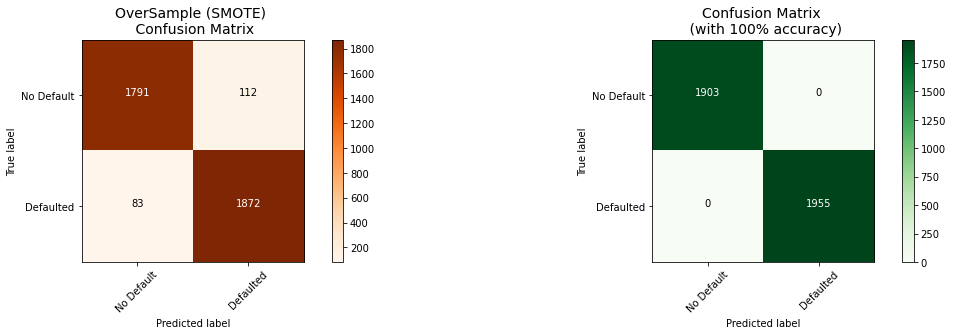

In [70]:
# plotting our confusion matrixes
oversample_smote = confusion_matrix(y_test_sos, smote_default_predictions)
actual_cm = confusion_matrix(y_test_sos, y_test_sos)
labels = ['No Default', 'Defaulted']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

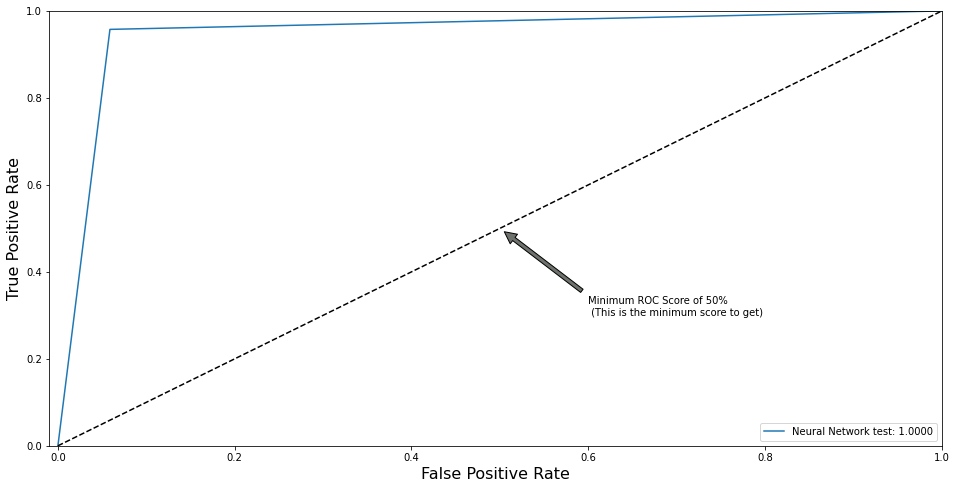

In [71]:
# ROC Curve
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test_sos, smote_default_predictions)

def graph_roc_curve_multiple(rf_fpr, rf_tpr):
    plt.figure(figsize=(16,8))
    plt.plot(rf_fpr, rf_tpr, label='Neural Network test: {:.4f}'.format(roc_auc_score(y_test, rf_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(rf_fpr, rf_tpr)
plt.show()

In [98]:
from sklearn.metrics import classification_report

print('Neural network:')
print(classification_report(y_test_sos, smote_default_predictions))

Neural network:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1903
           1       0.96      0.96      0.96      1955

    accuracy                           0.96      3858
   macro avg       0.96      0.96      0.96      3858
weighted avg       0.96      0.96      0.96      3858

